## Кластеризация эмоциональных данных

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [28]:
def get_center(data):
    return sum(data) / len(data)

In [29]:
def get_clusters_centers(data, labels, clusters_number):
    centers = []
    for i in range(clusters_number):
        cluster = []
        for j in range(len(data)):
            if labels[j] == i:
                cluster.append(data[j])
        centers.append(sum(cluster) / len(cluster))
    return centers

In [30]:
def compare_clusters_centers(original_clusters, result_clusters):
    results = []
    for res_cluster in result_clusters:
        distances = [np.linalg.norm(res_cluster - orig_cluster) for orig_cluster in original_clusters]
        min_distance = min(distances)
        closest_cluster = original_clusters[distances.index(min_distance)]
        ratio = min_distance / np.linalg.norm(closest_cluster)
        obj = {
            "result_cluster": res_cluster,
            "closest_cluster": closest_cluster,
            "difference": min_distance,
            "accuracy": 1.0 - ratio if ratio <= 1.0 else 0.0
        }
        results.append(obj)
    return results

In [2]:
data_path = "C:\Study\emotional_data"

positive_sample_path = f"{data_path}/features/6a55ec57bc205ec887af4f59134d286e.npy"
sad_sample_path = f"{data_path}/features/4cb3546804898bd6760acce6e47a0938.npy"

positive_sample = np.load(positive_sample_path)
sad_sample = np.load(sad_sample_path)

In [3]:
positive_df = pd.DataFrame(positive_sample[0]).T
positive_df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,...,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000
1,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,...,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000
2,-46.854893,-46.808994,-47.406044,-48.658009,-50.008831,-50.621418,-50.574001,-50.745338,-51.713352,-53.646950,...,-80.000000,-80.000000,-80.000000,-76.529556,-78.776703,-80.000000,-80.000000,-80.000000,-77.874847,-80.000000
3,-38.429432,-33.945080,-37.908108,-45.604256,-54.972023,-56.971523,-48.762295,-45.745861,-46.414303,-49.324287,...,-69.454300,-69.259323,-68.921814,-63.948017,-64.375702,-67.393570,-72.559494,-72.645508,-69.476089,-71.330612
4,-43.806061,-34.946583,-37.495686,-44.329891,-55.788532,-53.662148,-46.225708,-44.329151,-46.407078,-49.603504,...,-66.583572,-69.056259,-73.016663,-69.693436,-67.955246,-67.718887,-69.293320,-67.896133,-67.277023,-71.296768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
544,-42.214550,-37.984032,-40.475513,-47.175964,-54.360348,-51.762032,-51.074047,-53.204540,-58.144833,-53.686207,...,-69.406021,-72.190903,-70.491943,-71.381714,-70.106918,-68.769806,-72.016464,-69.119858,-69.939316,-71.309982
545,-36.558746,-29.487160,-32.847149,-40.178516,-47.845989,-43.788307,-45.195484,-53.271282,-51.768646,-48.031044,...,-72.913406,-67.461334,-69.588638,-71.556931,-74.284332,-72.209335,-68.234177,-69.049194,-74.429199,-73.036652
546,-28.142094,-25.324905,-29.066536,-35.784874,-43.611958,-43.649845,-44.576954,-49.095608,-54.910412,-49.591854,...,-69.787857,-68.429443,-68.504990,-67.929703,-69.687393,-70.747345,-67.278244,-66.489761,-74.706207,-71.069595
547,-32.285755,-28.022606,-31.117085,-37.295082,-45.197414,-49.408325,-49.836475,-47.947754,-48.811802,-51.116573,...,-67.962906,-69.461349,-69.065628,-70.191147,-70.873474,-71.772629,-66.648804,-72.014679,-73.044128,-71.490906


In [4]:
sad_df = pd.DataFrame(sad_sample[0]).T
sad_df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,...,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000
1,-67.389633,-67.188889,-67.071625,-67.157471,-67.493233,-68.065773,-68.820320,-69.686302,-70.621887,-71.665321,...,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-79.063446,-80.000000,-80.000000,-79.365234
2,-48.155243,-48.997208,-53.794586,-53.132576,-54.529510,-54.979782,-56.466721,-61.313560,-58.713791,-53.887627,...,-72.081017,-71.332336,-67.438965,-65.101295,-63.895012,-63.847313,-58.714134,-62.284523,-62.537392,-64.666351
3,-47.189392,-48.759933,-56.136391,-59.590813,-55.202538,-57.769707,-57.123024,-54.600586,-56.823776,-63.713211,...,-72.444496,-68.771362,-66.474426,-67.042305,-68.813141,-71.501175,-65.453972,-66.756721,-63.048752,-63.118439
4,-42.198212,-42.787926,-49.447433,-48.248230,-46.439377,-47.636459,-50.553711,-54.509720,-62.601929,-60.078178,...,-67.542007,-68.590988,-68.138664,-65.760551,-64.255066,-65.236557,-64.267670,-63.555603,-64.106827,-66.615837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,-27.922380,-30.982615,-36.724434,-41.880371,-45.244423,-50.324318,-55.423996,-53.950104,-53.092628,-52.547791,...,-62.240883,-59.309441,-60.329979,-60.659317,-58.075317,-55.285828,-54.877884,-55.900589,-56.619377,-57.332405
379,-25.187292,-33.677490,-44.480537,-55.792709,-51.045029,-48.976303,-49.434952,-50.724121,-51.706993,-53.870712,...,-56.815315,-62.166199,-59.944321,-59.636208,-58.575668,-58.026619,-56.277130,-50.952217,-55.583160,-58.687813
380,-25.510996,-30.558935,-37.540718,-41.148232,-40.998833,-41.959923,-45.139900,-52.314957,-59.293282,-59.758614,...,-63.416405,-60.826256,-58.340958,-58.851936,-57.775177,-55.835587,-56.980774,-54.906631,-56.191277,-55.895439
381,-26.364691,-31.269667,-38.092026,-43.467644,-47.885750,-51.376450,-48.703217,-48.310669,-51.244255,-56.458260,...,-60.851952,-58.638588,-57.596848,-56.889168,-55.491997,-56.339256,-56.469833,-58.236282,-56.842903,-61.456444


### K-Means

In [5]:
from sklearn.cluster import KMeans

k_means = KMeans(init="k-means++", n_init=15, n_clusters=2)

In [19]:
positive_df_sampler = positive_df.iloc[np.random.permutation(len(positive_df))[0:549]]
sad_df_sampler = sad_df.iloc[np.random.permutation(len(sad_df))[0:383]]

In [20]:
positive_df_sampler

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
81,-27.531643,-30.411213,-36.050655,-44.736286,-52.159714,-46.175423,-45.015057,-45.901245,-46.719822,-48.260479,...,-68.803986,-67.898407,-70.165115,-69.649841,-71.168884,-67.830109,-66.268860,-66.902557,-71.364166,-72.640839
154,-25.396080,-26.794796,-30.649429,-37.779148,-52.788109,-48.625530,-46.249210,-47.107719,-49.009064,-48.885540,...,-71.409485,-73.577728,-72.435852,-69.564117,-70.526749,-68.721634,-70.836273,-70.849579,-67.930054,-71.821182
414,-26.344307,-27.704998,-31.605061,-32.862026,-23.296280,-20.170118,-21.639200,-29.221077,-39.895451,-34.087357,...,-59.713497,-59.073124,-58.444263,-53.269890,-49.303493,-47.462196,-52.421474,-47.096088,-48.406639,-52.679886
396,-25.354050,-23.847435,-28.913700,-34.737953,-16.382446,-11.214785,-11.961628,-18.988897,-39.349594,-44.144062,...,-64.670334,-66.111313,-67.536316,-64.374329,-67.928299,-64.666779,-64.592712,-62.063061,-60.844685,-62.984768
90,-29.159428,-25.775726,-29.945801,-37.571278,-46.368862,-41.941723,-42.177814,-46.553860,-50.584385,-52.114925,...,-67.238739,-69.413849,-69.921967,-70.757629,-70.165863,-70.599274,-68.203674,-69.344238,-69.654907,-71.922836
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,-32.461666,-40.936661,-49.078903,-44.419022,-27.565685,-24.111629,-25.531918,-32.882751,-38.008083,-37.592052,...,-51.665203,-52.372383,-46.463612,-45.603798,-37.298126,-35.752285,-40.312885,-43.715641,-37.233273,-36.382191
4,-43.806061,-34.946583,-37.495686,-44.329891,-55.788532,-53.662148,-46.225708,-44.329151,-46.407078,-49.603504,...,-66.583572,-69.056259,-73.016663,-69.693436,-67.955246,-67.718887,-69.293320,-67.896133,-67.277023,-71.296768
287,-23.870018,-25.959099,-30.694881,-29.503895,-25.341591,-23.814114,-24.117970,-26.283695,-31.371620,-40.650066,...,-67.516769,-67.081604,-63.245922,-60.633694,-53.397167,-48.921547,-50.023766,-56.611095,-47.099274,-48.645237
1,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,...,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000


In [21]:
sad_df_sampler

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
102,-27.749632,-32.176498,-39.401222,-49.741524,-54.168587,-55.029999,-53.946152,-51.439880,-51.063660,-52.209595,...,-70.170624,-69.205078,-66.316574,-65.253525,-62.905846,-62.279739,-63.093567,-62.925705,-56.596138,-58.426178
283,-24.543991,-6.369348,-4.477346,-9.129461,-9.593948,-9.541965,-12.014065,-12.149803,-11.690608,-16.428196,...,-52.428528,-55.522659,-64.688377,-55.700531,-56.050087,-63.048004,-67.251511,-73.450470,-71.099411,-73.576279
190,-17.424679,-6.113117,-6.180433,-8.831964,-7.232665,-9.522837,-8.095927,-5.418817,-7.190846,-22.007895,...,-74.356796,-75.947960,-66.898125,-54.989059,-48.662804,-44.602158,-54.822372,-61.537560,-62.336273,-63.002228
121,-35.566826,-31.738943,-35.842224,-42.574905,-46.877319,-49.072014,-53.374977,-54.833900,-52.320686,-49.466118,...,-75.654465,-71.938629,-73.963623,-74.138184,-73.331848,-71.356087,-72.246582,-71.738091,-70.043167,-70.594444
302,-26.005146,-26.875534,-30.297251,-31.762953,-30.499079,-33.475891,-43.917839,-46.086075,-51.184280,-48.343826,...,-42.116096,-38.101006,-39.147125,-39.480392,-35.762260,-43.088417,-43.956825,-41.523148,-36.639305,-41.967979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,-24.579618,-8.975982,-6.642642,-9.393024,-7.309951,-6.507402,-8.428833,-5.352376,-3.292408,-8.137385,...,-73.252472,-74.254539,-68.079559,-61.390549,-52.824127,-49.621117,-64.604019,-72.706535,-69.592369,-71.759834
74,-22.267763,-32.805344,-43.479187,-47.697128,-54.261887,-50.755211,-49.800896,-50.494949,-48.810699,-48.075294,...,-64.442787,-57.524033,-52.554771,-53.770714,-53.076332,-53.599876,-54.499016,-51.993980,-51.473282,-53.737289
66,-22.004435,-30.628489,-36.074768,-41.803825,-47.407242,-47.306030,-50.332870,-51.261971,-47.899948,-48.239868,...,-65.654831,-63.202682,-61.773148,-67.241402,-65.220184,-62.286270,-62.687088,-59.499619,-59.024025,-62.844917
69,-15.521334,-19.556505,-26.948481,-35.642944,-41.427834,-48.779564,-46.914017,-47.251007,-49.978333,-50.252037,...,-61.696198,-57.240021,-59.626450,-64.384750,-60.996796,-60.214767,-58.628876,-57.698341,-57.289490,-55.359924


In [22]:
test_df = pd.concat([positive_df_sampler, sad_df_sampler], axis=0)
test_df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
81,-27.531643,-30.411213,-36.050655,-44.736286,-52.159714,-46.175423,-45.015057,-45.901245,-46.719822,-48.260479,...,-68.803986,-67.898407,-70.165115,-69.649841,-71.168884,-67.830109,-66.268860,-66.902557,-71.364166,-72.640839
154,-25.396080,-26.794796,-30.649429,-37.779148,-52.788109,-48.625530,-46.249210,-47.107719,-49.009064,-48.885540,...,-71.409485,-73.577728,-72.435852,-69.564117,-70.526749,-68.721634,-70.836273,-70.849579,-67.930054,-71.821182
414,-26.344307,-27.704998,-31.605061,-32.862026,-23.296280,-20.170118,-21.639200,-29.221077,-39.895451,-34.087357,...,-59.713497,-59.073124,-58.444263,-53.269890,-49.303493,-47.462196,-52.421474,-47.096088,-48.406639,-52.679886
396,-25.354050,-23.847435,-28.913700,-34.737953,-16.382446,-11.214785,-11.961628,-18.988897,-39.349594,-44.144062,...,-64.670334,-66.111313,-67.536316,-64.374329,-67.928299,-64.666779,-64.592712,-62.063061,-60.844685,-62.984768
90,-29.159428,-25.775726,-29.945801,-37.571278,-46.368862,-41.941723,-42.177814,-46.553860,-50.584385,-52.114925,...,-67.238739,-69.413849,-69.921967,-70.757629,-70.165863,-70.599274,-68.203674,-69.344238,-69.654907,-71.922836
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,-24.579618,-8.975982,-6.642642,-9.393024,-7.309951,-6.507402,-8.428833,-5.352376,-3.292408,-8.137385,...,-73.252472,-74.254539,-68.079559,-61.390549,-52.824127,-49.621117,-64.604019,-72.706535,-69.592369,-71.759834
74,-22.267763,-32.805344,-43.479187,-47.697128,-54.261887,-50.755211,-49.800896,-50.494949,-48.810699,-48.075294,...,-64.442787,-57.524033,-52.554771,-53.770714,-53.076332,-53.599876,-54.499016,-51.993980,-51.473282,-53.737289
66,-22.004435,-30.628489,-36.074768,-41.803825,-47.407242,-47.306030,-50.332870,-51.261971,-47.899948,-48.239868,...,-65.654831,-63.202682,-61.773148,-67.241402,-65.220184,-62.286270,-62.687088,-59.499619,-59.024025,-62.844917
69,-15.521334,-19.556505,-26.948481,-35.642944,-41.427834,-48.779564,-46.914017,-47.251007,-49.978333,-50.252037,...,-61.696198,-57.240021,-59.626450,-64.384750,-60.996796,-60.214767,-58.628876,-57.698341,-57.289490,-55.359924


In [23]:
k_means.fit(test_df)
k_means_labels = k_means.predict(test_df)

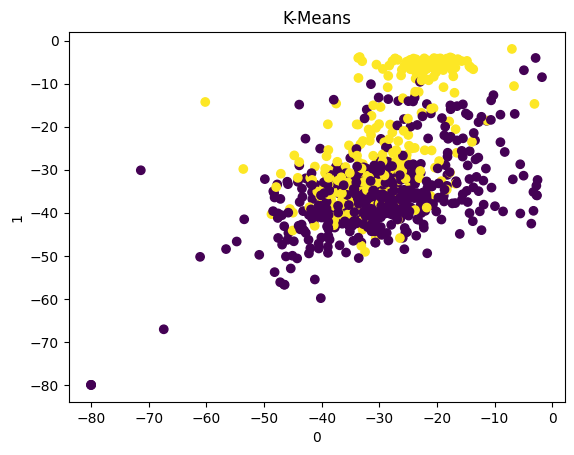

In [24]:
plt.scatter(test_df.loc[:, [0]], test_df.loc[:, [2]], c=k_means_labels)
plt.title('K-Means')
plt.xlabel(0)
plt.ylabel(1)
plt.show()

In [38]:
original_clusters_centers = [
    get_center(test_df.values[0:549]),
    get_center(test_df.values[549:])
]

In [39]:
compare_clusters_centers(original_clusters_centers, k_means.cluster_centers_)

[{'result_cluster': array([-29.989292, -30.352665, -35.186424, -40.29444 , -44.130585,
         -44.347153, -45.184673, -47.111954, -49.18144 , -50.981606,
         -52.518913, -52.947006, -54.073105, -55.22104 , -56.354652,
         -56.114883, -56.18381 , -56.618126, -57.250237, -57.7884  ,
         -58.38154 , -58.812813, -58.71782 , -58.713367, -58.92848 ,
         -59.23729 , -58.70221 , -60.45454 , -61.27367 , -60.977974,
         -62.86718 , -62.17761 , -62.816105, -62.838116, -63.172295,
         -63.581676, -63.568184, -63.885834, -64.7292  , -64.912735,
         -65.20591 , -65.38834 , -65.16801 , -65.67578 , -65.64418 ,
         -66.0031  , -66.42506 , -66.771355, -66.80447 , -66.6508  ,
         -66.48707 , -66.58027 , -66.897026, -67.15891 , -67.59787 ,
         -67.249725, -66.83562 , -66.08813 , -65.27158 , -64.828735,
         -64.67379 , -64.19485 , -63.67738 , -65.38378 ], dtype=float32),
  'closest_cluster': array([-32.430923, -30.792229, -34.372776, -36.83314 , -36.

### GMM

In [40]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2)
gmm.fit(test_df)
gmm_labels = gmm.predict(test_df)

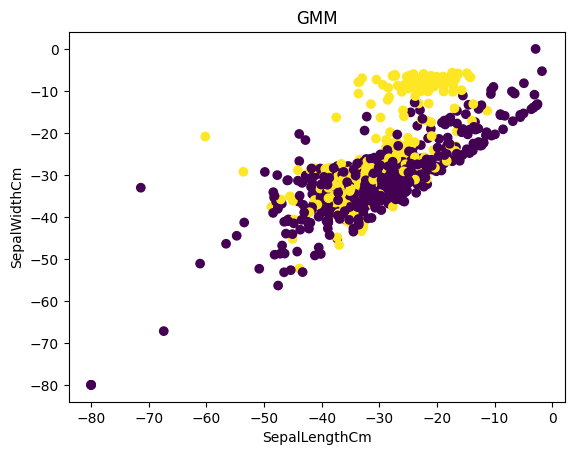

In [41]:
plt.scatter(test_df.loc[:, [0]], test_df.loc[:, [1]], c=gmm_labels)
plt.title('GMM')
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.show()

In [50]:
gmm_centers = get_clusters_centers(test_df.values, gmm_labels, 2)
compare_clusters_centers(original_clusters_centers, gmm_centers)

[{'result_cluster': array([-29.9433  , -30.345812, -35.131145, -40.222607, -44.007008,
         -44.22854 , -45.055653, -46.975655, -49.032322, -50.806293,
         -52.33805 , -52.73739 , -53.78047 , -54.990967, -56.212826,
         -55.996357, -56.08245 , -56.422348, -57.01327 , -57.547436,
         -58.19799 , -58.64474 , -58.5334  , -58.530407, -58.723194,
         -59.001755, -58.543198, -60.285763, -61.100018, -60.86048 ,
         -62.7513  , -62.01747 , -62.61421 , -62.65296 , -63.05416 ,
         -63.373455, -63.356106, -63.740623, -64.55276 , -64.684906,
         -65.017845, -65.20407 , -64.97892 , -65.47454 , -65.43347 ,
         -65.77615 , -66.24003 , -66.6134  , -66.630295, -66.46258 ,
         -66.31419 , -66.41656 , -66.6995  , -66.96699 , -67.43496 ,
         -66.9954  , -66.514694, -65.791626, -64.96414 , -64.44702 ,
         -64.237976, -63.831524, -63.290325, -64.96204 ], dtype=float32),
  'closest_cluster': array([-32.430923, -30.792229, -34.372776, -36.83314 , -36.

In [51]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(test_df)

In [52]:
from sklearn.manifold import TSNE

perplexity = 15
tsne = TSNE(n_components=2, perplexity=perplexity)
tsne_data = tsne.fit_transform(scaled_data)

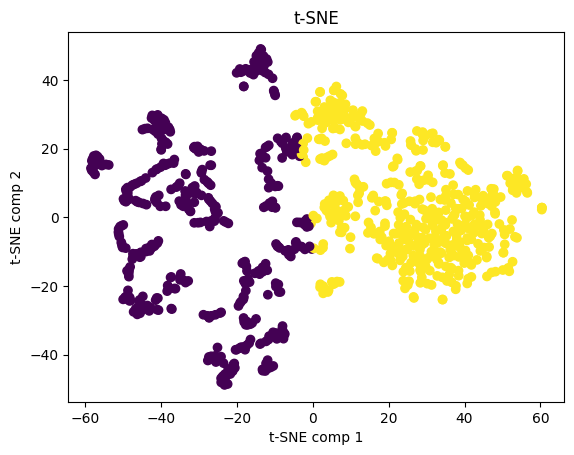

In [53]:
k_means_t_sne = KMeans(init="k-means++", n_init=15, n_clusters=2)
k_means_t_sne.fit(tsne_data)
t_sne_labels = k_means_t_sne.predict(tsne_data)

plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=t_sne_labels)
plt.title('t-SNE')
plt.xlabel('t-SNE comp 1')
plt.ylabel('t-SNE comp 2')
plt.show()

In [55]:
k_means_t_sne_centers = get_clusters_centers(test_df.values, t_sne_labels, 2)
compare_clusters_centers(original_clusters_centers, k_means_t_sne_centers)

[{'result_cluster': array([-28.37754 , -24.564226, -25.727089, -25.975494, -22.921581,
         -21.057463, -21.345428, -23.764582, -27.942621, -31.612185,
         -33.716198, -33.463535, -33.728817, -33.25041 , -35.19251 ,
         -36.33165 , -37.14567 , -37.67203 , -38.009804, -39.32518 ,
         -41.452007, -43.053036, -43.42068 , -43.21167 , -43.588875,
         -45.56586 , -47.447407, -50.235073, -50.959373, -50.754414,
         -52.196247, -51.326   , -52.10912 , -52.507843, -52.03795 ,
         -50.962433, -50.90086 , -50.915524, -50.585766, -50.116024,
         -50.07332 , -50.034153, -49.704563, -50.20331 , -49.517117,
         -49.384537, -50.6146  , -53.156754, -53.17998 , -52.625317,
         -52.137474, -53.37536 , -55.324924, -56.47504 , -57.715347,
         -58.366383, -58.442978, -57.372   , -56.62192 , -56.807014,
         -57.512478, -56.17201 , -54.982037, -56.743793], dtype=float32),
  'closest_cluster': array([-25.537155, -24.168083, -26.997496, -31.267025, -33.